In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv',)

Mass is conserved. 

Mass is conserved. 

CPU times: user 27.4 ms, sys: 1.47 ms, total: 28.9 ms
Wall time: 28.3 ms


In [3]:
kfit1 = np.array([1e02, 1e-09, 1e+02, 1e+05, 1e+05, 1e-02, 1e+00, 1e+02])
MKM1.create_csv(k_inp = kfit1,label='rate_coeff') #sol1 = coverages, solt=corresponding time. These awere calculated before from MKM1

In [4]:
kfits = pd.read_csv('rate_coeff.csv').to_numpy().transpose()[0]#

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

An essentially zero vector is present and therefore cant be normalized. The same vector has been returned.

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [5.81039593e-02 2.44993342e-02 1.45363984e+03 1.15002358e+05
 2.60000000e+05 1.62886352e+03 1.16760217e+02 7.10636114e+02]


<IPython.core.display.Javascript object>


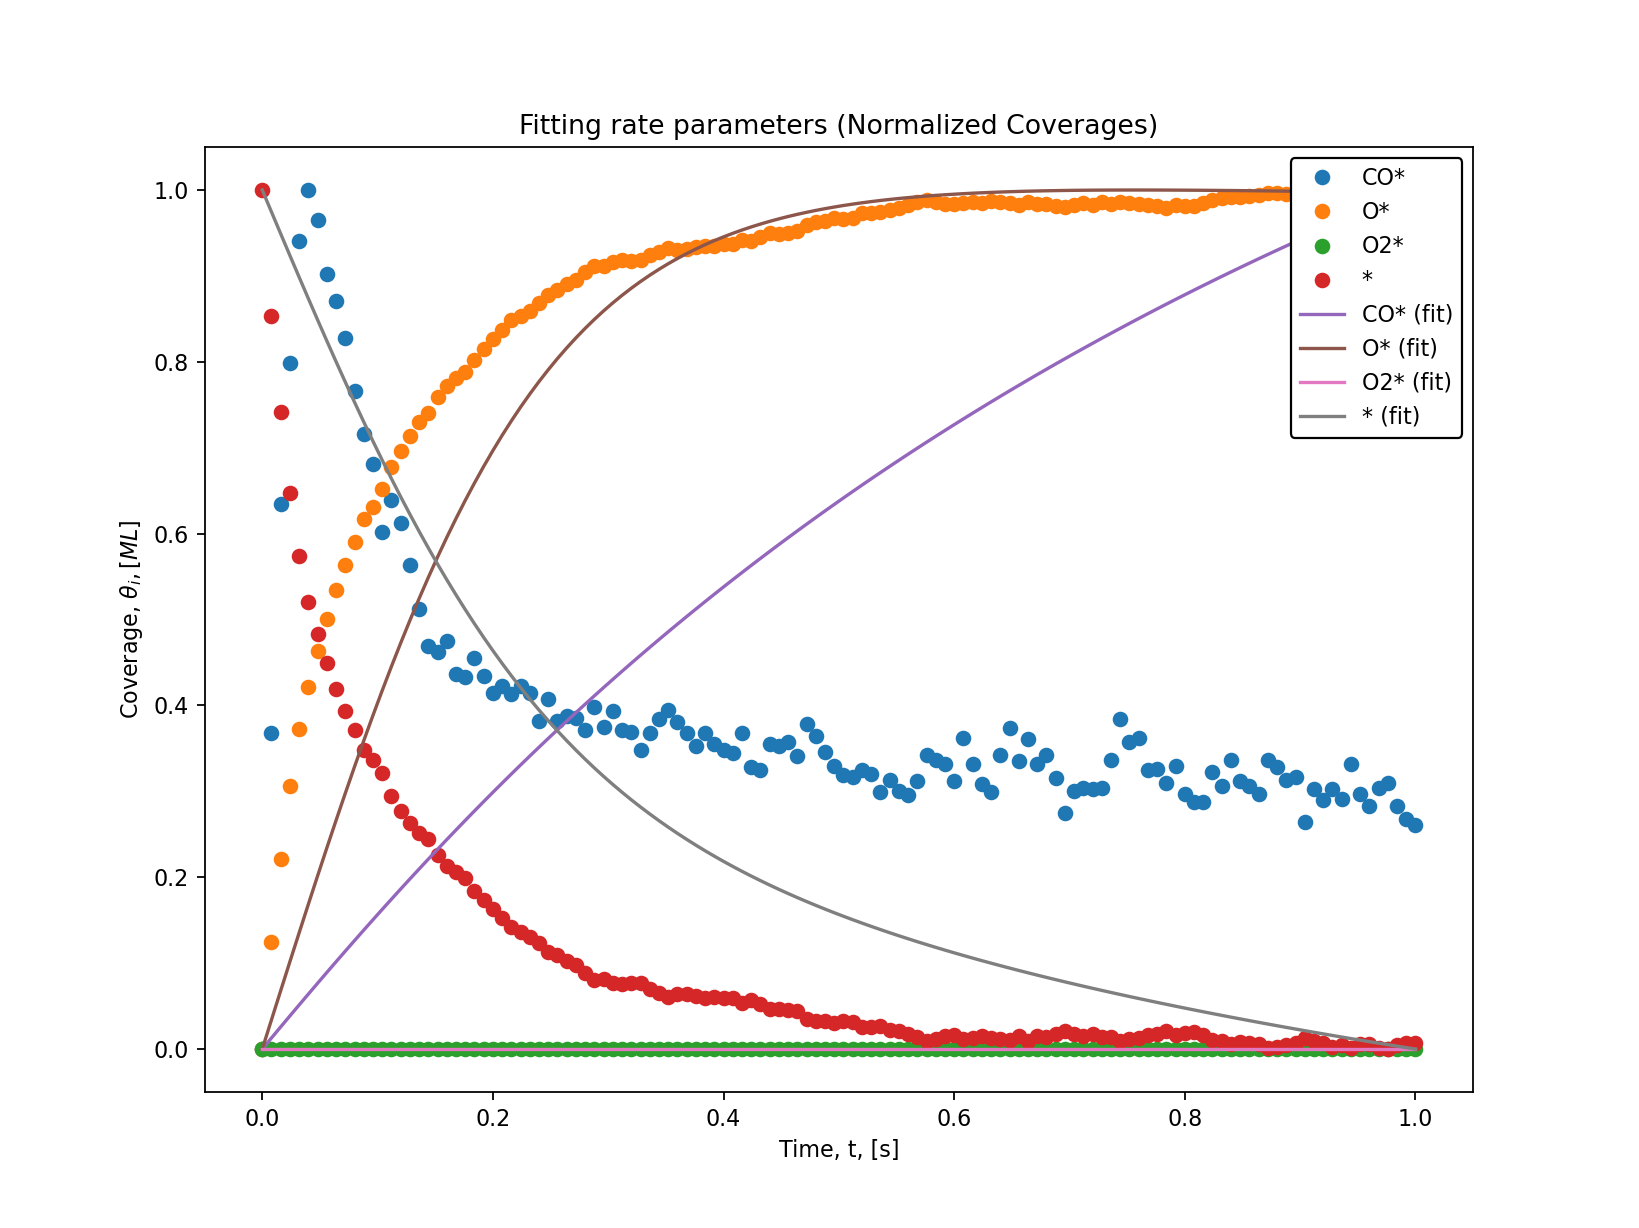

CPU times: user 19.1 s, sys: 1.82 s, total: 20.9 s
Wall time: 12.8 s


In [5]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit.k  #Resetting the rate constants used in MK model for fitting
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',plot_norm=True) #cf stands for curve fit
kfit1 = fit.fitted_k

In [6]:
fit.Input.to_numpy()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [1.00000000e-01, 6.07638889e-03, 3.04904514e-02, 0.00000000e+00,
        9.63433160e-01],
       [2.00000000e-01, 1.10134549e-02, 5.55555556e-02, 0.00000000e+00,
        9.33430990e-01],
       ...,
       [2.48000000e+01, 8.02951389e-03, 4.42491319e-01, 0.00000000e+00,
        5.49479167e-01],
       [2.49000000e+01, 8.08376736e-03, 4.41731771e-01, 0.00000000e+00,
        5.50184462e-01],
       [2.50000000e+01, 7.81250000e-03, 4.42382812e-01, 0.00000000e+00,
        5.49804688e-01]])